# Entregable Etapa 4: Análisis preliminar de los datos


# Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Lectura de Datos

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/Shareddrives/Reto Equipo 2/datos_tec.csv')

In [4]:
df.head()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051


In [5]:
df.tail()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9389,15/09/2020 0:00,100.0,352,3.52,15.6,17.6,0.031
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059
9391,17/09/2020 0:00,101.0,413,2.03,18.8,18.7,0.058


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       9392 non-null   object 
 1   Dureza     9391 non-null   float64
 2   Tasa_Prod  9392 non-null   int64  
 3   Asp        9391 non-null   float64
 4   EC         9392 non-null   float64
 5   EE         9392 non-null   float64
 6   Calidad    9392 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 513.8+ KB


In [7]:
df.shape

(9392, 7)

### Valores ausentes

In [8]:
null=df[df.isnull().any(1)]
null

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
60,02/03/1995 0:00,NaN,402,2.93,26.7,15.8,0.093
62,04/03/1995 0:00,103.0,391,NaN,20.3,20.3,0.093


In [9]:
#Eliminar las filas con valores nulos
df=df.drop([60,62])

In [10]:
df['Tasa_Prod']=df['Tasa_Prod'].fillna(0)
df=df.drop(df[df['Tasa_Prod']==0].index)
df

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...,...
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9389,15/09/2020 0:00,100.0,352,3.52,15.6,17.6,0.031
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059


### Atributos vs Tiempo

In [11]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Dureza'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Dureza'])\nplt.show()"

In [12]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Tasa_Prod'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Tasa_Prod'])\nplt.show()"

In [13]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Asp'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Asp'])\nplt.show()"

In [14]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['EC'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['EC'])\nplt.show()"

In [15]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['EE'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['EE'])\nplt.show()"

In [16]:
'''fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Calidad'])
plt.show()'''

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Calidad'])\nplt.show()"

# Detección de Outliers

In [17]:
df.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000
mean,104.033040,393.856147,3.152711,19.449507,19.140474,0.090004
std,2.052937,27.750413,0.371904,6.577180,7.991757,0.048889
min,80.000000,184.000000,0.350000,0.000000,0.000000,0.000000
25%,103.000000,384.000000,3.040000,16.000000,14.400000,0.061000
50%,104.000000,398.000000,3.260000,19.200000,20.100000,0.081000
75%,105.000000,409.000000,3.380000,23.500000,25.300000,0.107000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


In [18]:
Q1_Prod = df['Tasa_Prod'].quantile(0.3)
Q3_Prod = df['Tasa_Prod'].quantile(0.7)
IQR_Prod = Q3_Prod - Q1_Prod

clf = df[~(df['Tasa_Prod'] < (Q1_Prod - 1.5 * IQR_Prod))]

Q1_Calidad = clf['Calidad'].quantile(0.3)
Q3_Calidad = clf['Calidad'].quantile(0.7)
IQR_Calidad = Q3_Calidad - Q1_Calidad

clf = clf[~(clf['Calidad'] < (Q1_Calidad - 0.75 * IQR_Calidad))]
clf

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...,...
9386,12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059


In [19]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000


**Dureza**

{'boxes': [<matplotlib.lines.Line2D at 0x7ffa955d5b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffa95561c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa95567c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa95567710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffa95561190>,
  <matplotlib.lines.Line2D at 0x7ffa955616d0>]}

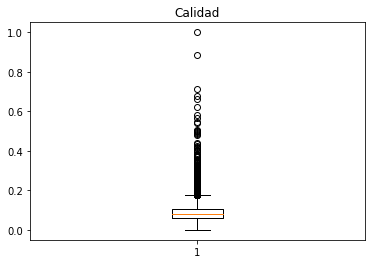

In [20]:
plt.title('Calidad')
plt.boxplot(df.Calidad) 

{'boxes': [<matplotlib.lines.Line2D at 0x7ffa950b2690>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffa950b6690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa950be6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa950be190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffa950b2bd0>,
  <matplotlib.lines.Line2D at 0x7ffa950b6150>]}

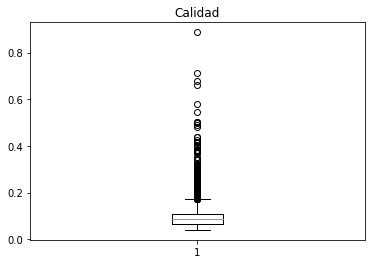

In [21]:
plt.title('Calidad')
plt.boxplot(clf.Calidad) 

**Tasa de Producción**

{'boxes': [<matplotlib.lines.Line2D at 0x7ffa9501ce50>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffa95022e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa95028ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa95028950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffa950223d0>,
  <matplotlib.lines.Line2D at 0x7ffa95022910>]}

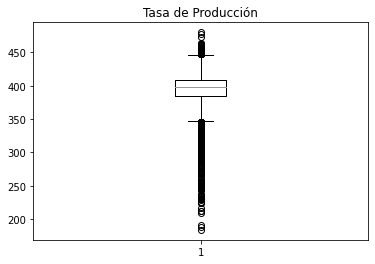

In [22]:
plt.title('Tasa de Producción')
plt.boxplot(df.Tasa_Prod)

{'boxes': [<matplotlib.lines.Line2D at 0x7ffa94f98050>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffa94f98e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa94f9eed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa94f9e990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffa94f98490>,
  <matplotlib.lines.Line2D at 0x7ffa94f98a50>]}

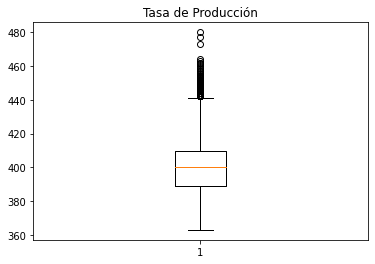

In [23]:
plt.title('Tasa de Producción')
plt.boxplot(clf.Tasa_Prod)

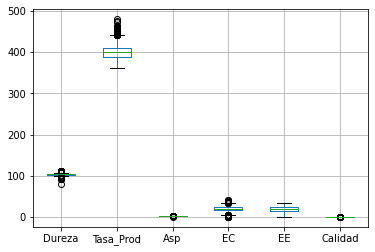

In [24]:
clf.boxplot(column=['Dureza', 'Tasa_Prod', 'Asp', 'EC', 'EE', 'Calidad'])

# Correlación

In [25]:
clf.set_index('TIME', inplace=True)   
clf   

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
TIME,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061


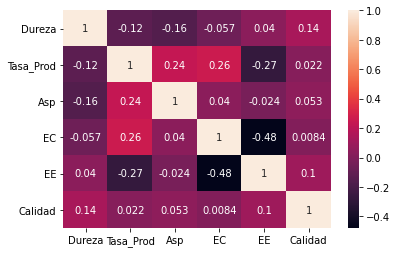

In [26]:
clf = clf.select_dtypes(include=['float64','int']) 
corr_matrix = clf.corr(method = 'pearson') 
sn.heatmap(corr_matrix, annot = True) 
plt.show() 

#Costo

In [27]:
clf

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
TIME,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061


In [28]:
clf['Costo_Total'] = pd.Series(clf['EE'] + (.724 * clf['EC']))
clf['Costo_Ponderado'] = pd.Series(clf['Costo_Total'] / clf['Tasa_Prod']) 
clf['EE_Ponderado'] = pd.Series(clf['EE'] / clf['Tasa_Prod'])
clf['EC_Ponderado'] = pd.Series(clf['EC'] / clf['Tasa_Prod']) 
clf

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414,0.080707,0.041033
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108,19.4756,0.045717,0.000000,0.063146
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098,21.3580,0.047888,0.000000,0.066143
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056,39.0836,0.098946,0.064304,0.047848
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051,39.2700,0.103342,0.070000,0.046053
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103,25.7520,0.062963,0.022249,0.056235
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108,37.0356,0.089675,0.060048,0.040920
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061,29.6108,0.072575,0.034069,0.053186


In [29]:
clf['Costo_Ponderado'].mean()

0.08489429080665893

In [30]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814,33.883938,0.084894,0.049156,0.049362
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528,6.872697,0.017977,0.019904,0.015694
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000,30.156800,0.074167,0.036675,0.041397
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000,34.618000,0.086383,0.051000,0.048628
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000,38.828800,0.098497,0.064573,0.059326
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000,50.138000,0.127841,0.093407,0.102290


# Nuevas Variables Categóricas

In [31]:
#Crear columna total 
import copy 
new_clf = copy.deepcopy(clf) 
new_df = copy.deepcopy(clf) 

In [32]:
'''new_clf.loc[clf.Calidad < 0.075,'Calidad_Categorica']='Aceptable'  
new_clf.loc[(clf.Calidad > .074) & (clf.Calidad < .1),'Calidad_Categorica'] = 'Regular'   
new_clf.loc[(clf.Calidad > .099) & (clf.Calidad < 0.14),'Calidad_Categorica'] = 'Bueno'   
new_clf.loc[clf.Calidad > 0.14,'Calidad_Categorica']='Excelente'
new_clf['Calidad_Categorica']=new_clf['Calidad_Categorica'].fillna('Excelente') 
del(new_clf['Calidad'])      
new_clf'''

"new_clf.loc[clf.Calidad < 0.075,'Calidad_Categorica']='Aceptable'  \nnew_clf.loc[(clf.Calidad > .074) & (clf.Calidad < .1),'Calidad_Categorica'] = 'Regular'   \nnew_clf.loc[(clf.Calidad > .099) & (clf.Calidad < 0.14),'Calidad_Categorica'] = 'Bueno'   \nnew_clf.loc[clf.Calidad > 0.14,'Calidad_Categorica']='Excelente'\nnew_clf['Calidad_Categorica']=new_clf['Calidad_Categorica'].fillna('Excelente') \ndel(new_clf['Calidad'])      \nnew_clf"

In [33]:
new_clf.loc[clf.Calidad < 0.1,'Calidad_Categorica']='Aceptable'   
new_clf.loc[(clf.Calidad > .1) & (clf.Calidad < .12),'Calidad_Categorica'] = 'Regular'    
new_clf.loc[(clf.Calidad > .12) & (clf.Calidad < 0.15),'Calidad_Categorica'] = 'Bueno'   
new_clf.loc[clf.Calidad > 0.15,'Calidad_Categorica']='Excelente'    
new_clf['Calidad_Categorica']=new_clf['Calidad_Categorica'].fillna('Regular')    
del(new_clf['Calidad'])   
new_clf  

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado,Calidad_Categorica
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,40.6324,0.110414,0.080707,0.041033,Aceptable
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,19.4756,0.045717,0.000000,0.063146,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,21.3580,0.047888,0.000000,0.066143,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,39.0836,0.098946,0.064304,0.047848,Aceptable
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,39.2700,0.103342,0.070000,0.046053,Aceptable
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,25.7520,0.062963,0.022249,0.056235,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,37.0356,0.089675,0.060048,0.040920,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,29.6108,0.072575,0.034069,0.053186,Aceptable


In [34]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814,33.883938,0.084894,0.049156,0.049362
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528,6.872697,0.017977,0.019904,0.015694
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000,30.156800,0.074167,0.036675,0.041397
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000,34.618000,0.086383,0.051000,0.048628
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000,38.828800,0.098497,0.064573,0.059326
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000,50.138000,0.127841,0.093407,0.102290


In [35]:
Q1_CostPond = new_clf['Costo_Ponderado'].quantile(0.25) 
Q3_CostPond = new_clf['Costo_Ponderado'].quantile(0.8)  
IQR_CostPond = Q3_CostPond - Q1_CostPond 
 
new_clf = new_clf[~(new_clf['Costo_Ponderado'] > (Q3_CostPond))]
new_clf

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado,Calidad_Categorica
TIME,,,,,,,,,,
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,19.4756,0.045717,0.000000,0.063146,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,21.3580,0.047888,0.000000,0.066143,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,39.0836,0.098946,0.064304,0.047848,Aceptable
06/01/1995 0:00,105.0,393,2.95,26.1,0.0,18.8964,0.048082,0.000000,0.066412,Bueno
07/01/1995 0:00,108.0,400,2.95,27.7,0.0,20.0548,0.050137,0.000000,0.069250,Excelente
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,25.7520,0.062963,0.022249,0.056235,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,37.0356,0.089675,0.060048,0.040920,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,29.6108,0.072575,0.034069,0.053186,Aceptable


In [36]:
new_clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000
mean,104.129868,402.125058,3.203054,19.880838,17.426408,31.820135,0.079285,0.043575,0.049322
std,1.986074,17.528664,0.287852,6.927491,7.048908,6.060261,0.015520,0.017970,0.016811
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,390.000000,3.140000,16.000000,13.300000,28.968800,0.071094,0.033014,0.040399
50%,104.000000,401.000000,3.270000,19.800000,18.600000,32.890800,0.081610,0.046469,0.049246
75%,105.000000,413.000000,3.380000,24.400000,22.500000,36.280400,0.091408,0.056757,0.060714
max,112.000000,480.000000,3.520000,40.400000,32.700000,42.835600,0.100910,0.083784,0.102290


In [37]:
del(new_clf['Costo_Ponderado'])
del(new_clf['Costo_Total'])
del(new_clf['EE_Ponderado'])
del(new_clf['EC_Ponderado'])


In [38]:
new_clf


,Dureza,Tasa_Prod,Asp,EC,EE,Calidad_Categorica
TIME,,,,,,
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,Aceptable
06/01/1995 0:00,105.0,393,2.95,26.1,0.0,Bueno
07/01/1995 0:00,108.0,400,2.95,27.7,0.0,Excelente
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,Aceptable


# Modelo de clasificación

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
X = new_clf.drop('Calidad_Categorica', axis=1) # Features
y = new_clf.Calidad_Categorica # Target variable 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 

In [42]:
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# train is now 60% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 20% of the initial data set
# validation is now 20% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

                 Dureza  Tasa_Prod   Asp    EC    EE
TIME                                                
28/09/2006 0:00   104.0        411  2.73  15.1  21.8
28/09/2002 0:00   104.0        395  3.25  23.4   6.2
21/01/1996 0:00   105.0        407  3.52  24.7  13.7
10/01/2000 0:00   103.0        387  2.64  28.6  17.0
15/11/2008 0:00   104.0        438  3.37  17.9  20.2
...                 ...        ...   ...   ...   ...
05/03/2009 0:00   106.0        419  3.47  19.6  20.5
18/11/1998 0:00   103.0        399  3.33  33.3   0.0
15/10/2013 0:00   104.0        408  3.52  20.4  21.8
07/06/2005 0:00   103.0        395  3.05  14.4  15.3
06/02/2007 0:00   103.0        415  2.44  20.0  19.8

[3867 rows x 5 columns]                  Dureza  Tasa_Prod   Asp    EC    EE
TIME                                                
22/02/2000 0:00   104.0        416  2.83  26.6  20.6
09/07/2012 0:00   104.0        377  3.15  23.1  18.2
09/01/2006 0:00   106.0        397  2.73  18.3  19.7
10/03/2018 0:00   101

In [43]:
models = []

models.append(('RF', RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 50)))

In [44]:
names = [] 
scores = [] 
fits = [] 
preds = [] 
 
for name, model in models:  
    fits.append(model.fit(x_train, y_train))  
    y_pred = model.predict(x_test) 
    preds.append(y_pred)  
    scores.append(accuracy_score(y_test, y_pred))  
    names.append(name)  

## Predicciones Calidad

In [45]:
y_predVal = fits[0].predict(x_val) 
y_predVal 

array(['Aceptable', 'Aceptable', 'Aceptable', ..., 'Aceptable', 'Regular',
       'Aceptable'], dtype=object)

# Calculo Costos con set de validación

In [46]:
#Crear columna total    
import copy   
new_X_val = copy.deepcopy(x_val)   

In [47]:
new_X_val['Costo'] = x_val['EE'] + (0.724*x_val['EC'])  
new_X_val['Calidad'] = y_predVal 

In [48]:
new_X_val

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
22/02/2000 0:00,104.0,416,2.83,26.6,20.6,39.8584,Aceptable
09/07/2012 0:00,104.0,377,3.15,23.1,18.2,34.9244,Aceptable
09/01/2006 0:00,106.0,397,2.73,18.3,19.7,32.9492,Aceptable
10/03/2018 0:00,101.0,404,3.42,20.0,23.8,38.2800,Aceptable
30/05/2019 0:00,101.0,401,3.44,19.9,24.2,38.6076,Aceptable
...,...,...,...,...,...,...,...
12/06/2016 0:00,105.0,401,3.45,22.6,0.0,16.3624,Aceptable
24/06/2011 0:00,103.0,403,3.26,22.3,18.1,34.2452,Aceptable
02/03/1997 0:00,103.0,419,3.41,28.3,7.1,27.5892,Aceptable


In [49]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [50]:
import plotly.graph_objects as go
import plotly.express as px 

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Dureza'],
    mode='markers',
    marker= dict( 
        size=5, 
        sizemode='diameter', 
        sizeref=1500,
        color = new_X_val['Costo'],
        #color_continuous_scale='Inferno'
        colorscale = [[0, 'lime'], [0.5, 'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Dureza',  
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Dureza del Soporte'),),) 



In [51]:
figT.write_html("images/Dureza.html") 

In [52]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Tasa_Prod'],
    mode='markers',
    marker= dict( 
        size=5, 
        sizemode='diameter', 
        sizeref=1500,
        color = new_X_val['Costo'],
        #color_continuous_scale='Inferno'
        colorscale = [[0, 'lime'], [0.5, 'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Tasa de Producción',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Tasa de producción'),),)


In [53]:
figT.write_html("images/Tasa_Prod.html")

In [54]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Asp'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Aspiración',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Aspiración'),),)

In [55]:
figT.write_html("images/Aspiracion.html")

In [56]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['EC'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Energía Calórica',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Energía Calórica'),),)

In [57]:
figT.write_html("images/EC.html")

In [58]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['EE'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Energía Eléctrica',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Energía Eléctrica'),),)

In [59]:
figT.write_html("images/EE.html")

In [60]:
calidadAceptable = new_X_val[new_X_val.Calidad == 'Aceptable'].sort_values(by = ['Costo'])
calidadAceptable 

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
19/11/2016 0:00,101.0,403,3.34,0.0,0.0,0.0000,Aceptable
19/03/2017 0:00,102.0,404,3.34,0.0,1.0,1.0000,Aceptable
10/04/2020 0:00,102.0,399,3.52,0.0,6.4,6.4000,Aceptable
08/04/2020 0:00,102.0,409,3.30,0.0,6.4,6.4000,Aceptable
13/04/2020 0:00,104.0,408,3.40,0.0,6.8,6.8000,Aceptable
...,...,...,...,...,...,...,...
18/08/1999 0:00,106.0,409,2.95,25.9,22.5,41.2516,Aceptable
13/06/2020 0:00,105.0,413,3.52,18.7,27.8,41.3388,Aceptable
13/11/1999 0:00,102.0,413,2.64,25.9,22.8,41.5516,Aceptable


In [61]:
calidadRegular = new_X_val[new_X_val.Calidad == 'Regular'].sort_values(by = ['Costo'])
calidadRegular

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
29/01/2016 0:00,110.0,375,3.16,15.1,25.2,36.1324,Regular
12/05/2016 0:00,110.0,397,3.44,20.9,21.6,36.7316,Regular
07/05/2014 0:00,111.0,390,3.34,20.0,23.1,37.5800,Regular
01/05/2016 0:00,110.0,400,3.42,15.4,28.5,39.6496,Regular


In [62]:
calidadBueno = new_X_val[new_X_val.Calidad == 'Bueno'].sort_values(by = ['Costo'])
calidadBueno

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
19/11/2014 0:00,99.0,391,3.52,1.9,29.8,31.1756,Bueno
25/07/1998 0:00,106.0,424,3.40,33.3,10.1,34.2092,Bueno
27/11/1998 0:00,107.0,419,3.44,33.6,10.0,34.3264,Bueno


In [63]:
calidadExcelente = new_X_val[new_X_val.Calidad == 'Excelente'].sort_values(by = ['Costo'])
calidadExcelente

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
17/03/1999 0:00,106.0,386,2.92,33.6,0.1,24.4264,Excelente
18/11/2014 0:00,98.0,396,3.52,1.8,29.8,31.1032,Excelente
17/11/2014 0:00,95.0,396,3.52,1.9,30.2,31.5756,Excelente
21/11/2014 0:00,97.0,396,3.52,1.9,30.2,31.5756,Excelente
23/11/2014 0:00,97.0,396,3.52,2.0,30.2,31.6480,Excelente


# Página web

In [64]:
import pickle  
filename = 'classifier.pkl'  
outfile = open(filename, 'wb') 

#Guardar datos
pickle.dump(fits[0], outfile, 2)

outfile.close()

In [65]:
r = fits[0].predict(([[106, 383, 2.94, 33, 0]]))
r

array(['Excelente'], dtype=object)